<a href="https://colab.research.google.com/github/Bhavnajha12/Electric-Vehicles-market-size-analysis/blob/main/EV_data_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Electric Vehicles Market Size Analysis using Python

In [31]:
import pandas as pd
import numpy as np

In [32]:
df=pd.read_csv("/content/Electric_Vehicle_Population_Data.csv")

In [33]:
ev_data=df.head(4)

In [34]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         4 non-null      object 
 1   County                                             4 non-null      object 
 2   City                                               4 non-null      object 
 3   State                                              4 non-null      object 
 4   Postal Code                                        4 non-null      float64
 5   Model Year                                         4 non-null      int64  
 6   Make                                               4 non-null      object 
 7   Model                                              4 non-null      object 
 8   Electric Vehicle Type                              4 non-null      object 
 9   Clean Alternat

In [35]:
ev_data.isnull() .sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [36]:
ev_data=df.dropna()

In [37]:
ev_data.isnull() .sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


TASK


1. EV Adoption Over Time: Analyze the growth of the EV population by model year.
2. EV Adoption Over Time: Analyze the growth of the EV population by model year.
3. EV Types: Breakdown of the dataset by electric vehicle type (BEV, etc.).
4. Make and Model Popularity: Identify the most popular makes and models among the registered EVs.
5. Electric Range Analysis: Analyze the electric range of vehicles to see how EV technology is progressing.
6. Estimated Growth in Market Size: Analyze and find the estimated growth in the market size of electric vehicles.

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

<ipython-input-39-80a460a6be95>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")


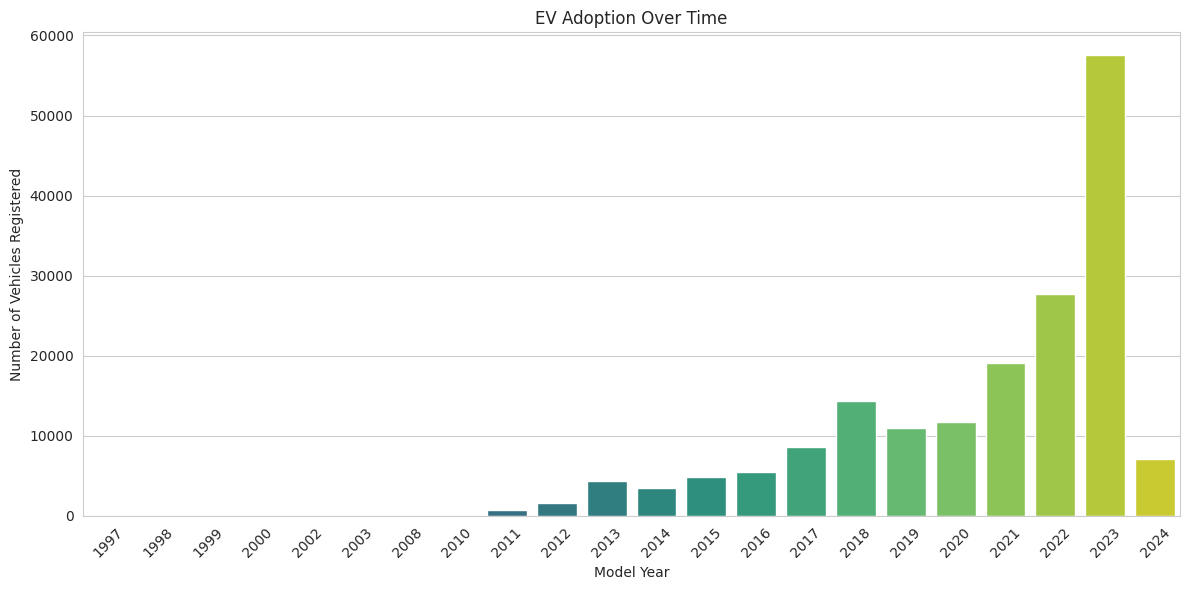

In [39]:
# EV Adoption Over Time
plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
# geographical distribution at county level
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index
top_counties

Index(['King', 'Snohomish', 'Pierce'], dtype='object', name='County')

In [41]:
# filtering the dataset for these top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]


In [42]:
# analyzing the distribution of EVs within the cities of these top counties
9
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

In [43]:
# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(11)

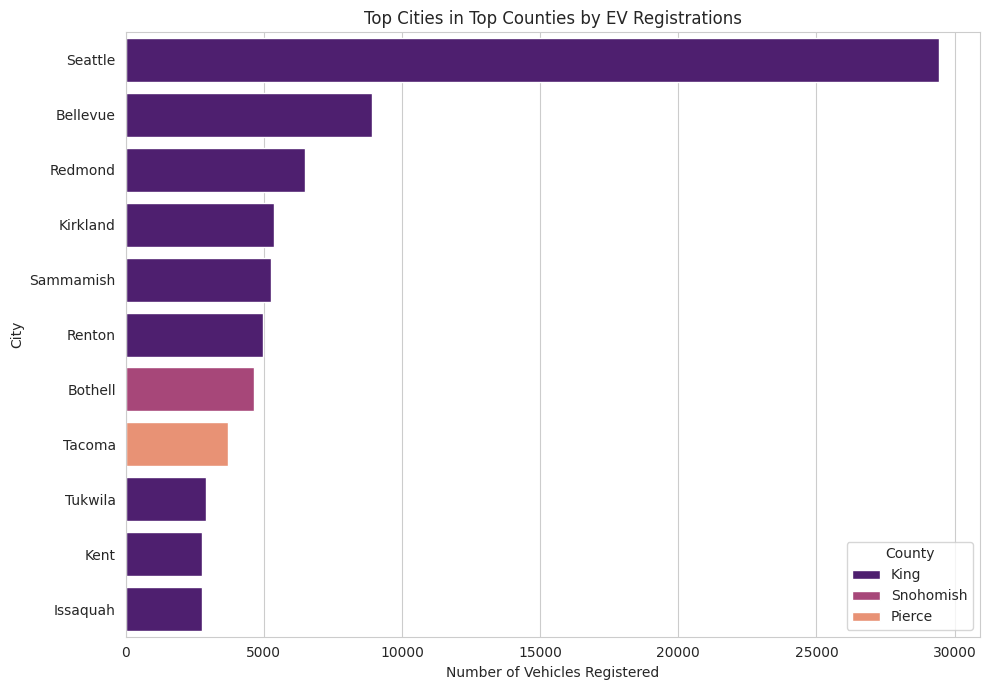

In [44]:
plt.figure(figsize=(10, 7))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

Here are the key findings from the above graph:

*   Seattle, which is in King County, has the highest number of EV registrations by a significant margin, far outpacing the other cities listed
*   Bellevue and Krikland, also in King County, follow Seattle with the next highest registrations, though these are considerably less than Seattle's.
*    Cities in Clark County, such as Vancouver show moderate EV registrations.
*     Bainbridge island representing Kitsap County, have the fewest EV registrations among the cities listed.
*     The majority of cities shown are from King County, which seems to dominate EV registrations among the three counties.
*     Overall, the graph indicates that EV adoption is not uniform across the cities and is more concentrated in certain areas, particularly in King County.





NEXT
* Explore the types of electric vehicles represented in this dataset. Understanding the breakdown between different EV types, such as Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV).

In [45]:
# analyzing the distribution of electric vehicle Types
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()
ev_type_distribution

,count
Electric Vehicle Type,
Battery Electric Vehicle (BEV),138947
Plug-in Hybrid Electric Vehicle (PHEV),38526


<ipython-input-46-30a0021b27f6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")


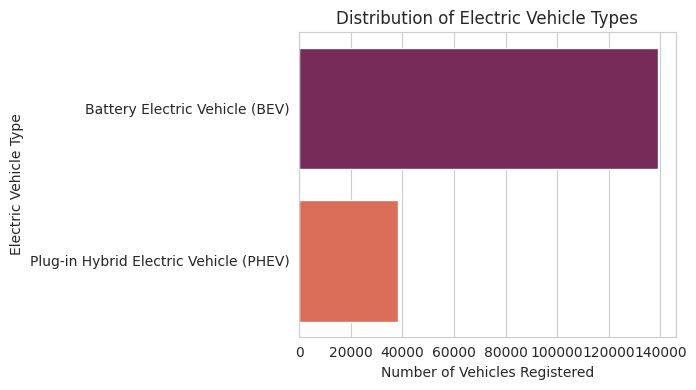

In [46]:
plt.figure(figsize=(7, 4))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles.

In [47]:
#Let’s now focus on the popularity of electric vehicle manufacturers and models among the registered vehicles.
# analyzing the popularity of EV manufacturers
ev_make_distribution = ev_data['Make'].value_counts().head(10)  # Limiting to top 10 for clarity

<ipython-input-48-80ec777523b9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")


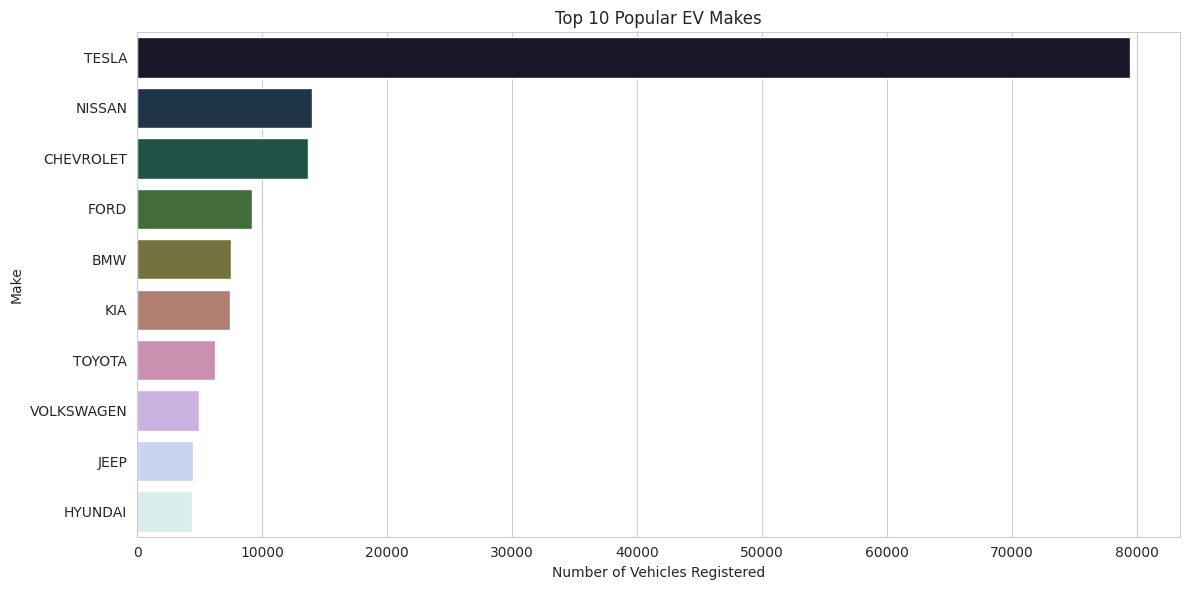

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

* TESLA leads by a substantial margin with the highest number of vehicles registered.
* NISSAN is the second most popular manufacturer, followed by CHEVROLET, though both have significantly fewer registrations than TESLA.
* BMW, FORD, KIA, TOYOTA, HYUNDAI, VOLKSWAGEN, and VOLVO follow in decreasing order of the number of registered vehicles.

**Next, let's drill down into the most popular models within these top manufacturers to get a more detailed understanding of consumer preferences at the model level:**

In [49]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index

In [50]:
# filtering the dataset for these top manufacturers
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

In [51]:
# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

In [52]:
# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

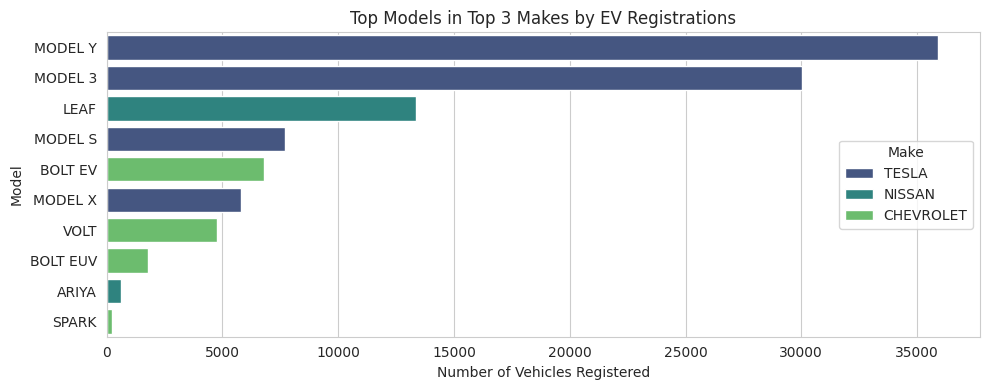

In [53]:
plt.figure(figsize=(10, 4))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

**Here are the findings:**

* TESLA’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations.
* NISSAN’s LEAF is the third most registered model and the most registered non-TESLA vehicle.
* TESLA’s MODEL S and MODEL X also have a significant number of registrations.
* CHEVROLET’s BOLT EV and VOLT are the next in the ranking with considerable registrations, followed by BOLT EUV.
* NISSAN’s ARIYA and CHEVROLET’s SPARK have the least number of registrations among the models shown.

**Explore the electric range of vehicles, which is a critical factor for analyzing the market size of electric vehicles.**

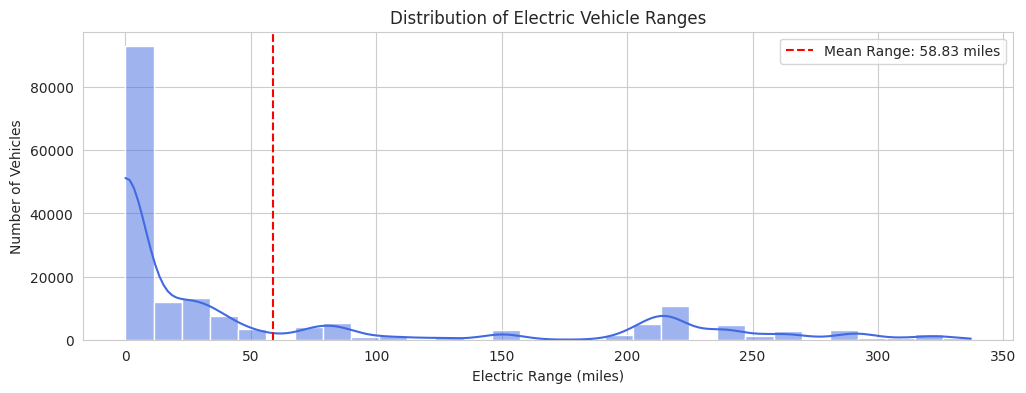

In [54]:
# analyzing the distribution of electric range
plt.figure(figsize=(12, 4))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

Key observations from the graph include:
* There is a high frequency of vehicles with a low electric range, with a significant peak occurring just before 50 miles.
* The distribution is skewed to the right, with a long tail extending towards higher ranges, although the number of vehicles with higher ranges is much less frequent.
* The mean electric range for this set of vehicles is marked at approximately 61.08 miles, which is relatively low compared to the highest ranges shown in the graph.
* Despite the presence of electric vehicles with ranges that extend up to around 350 miles, the majority of the vehicles have a range below the mean.
* It suggests that while there are EVs available with high electric ranges, the average range is skewed lower due to a substantial number of vehicles with shorter ranges.

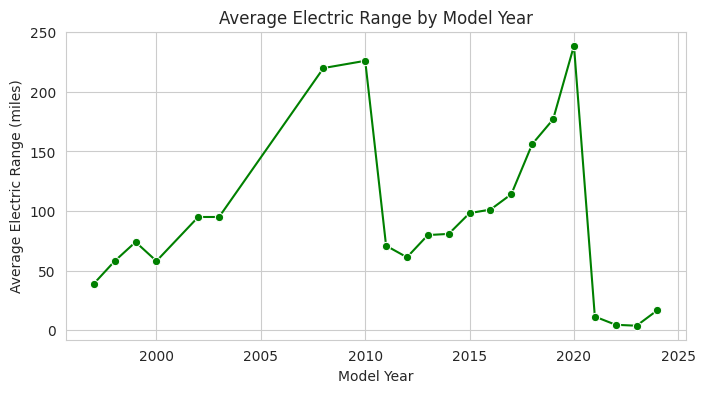

In [55]:
# calculating the average electric range by model year
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

The above graph shows the progression of the average electric range of vehicles from around the year 2000 to 2024. Key findings from the graph:

1. There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.
2. There is a noticeable peak around the year 2020 when the average range reaches its highest point.
3. Following 2020, there’s a significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.
4. After the sharp decline, there is a slight recovery in the average range in the most recent year shown on the graph.

The data suggest that while there have been fluctuations, the overall trend over the last two decades has been toward increasing the electric range of EVs.

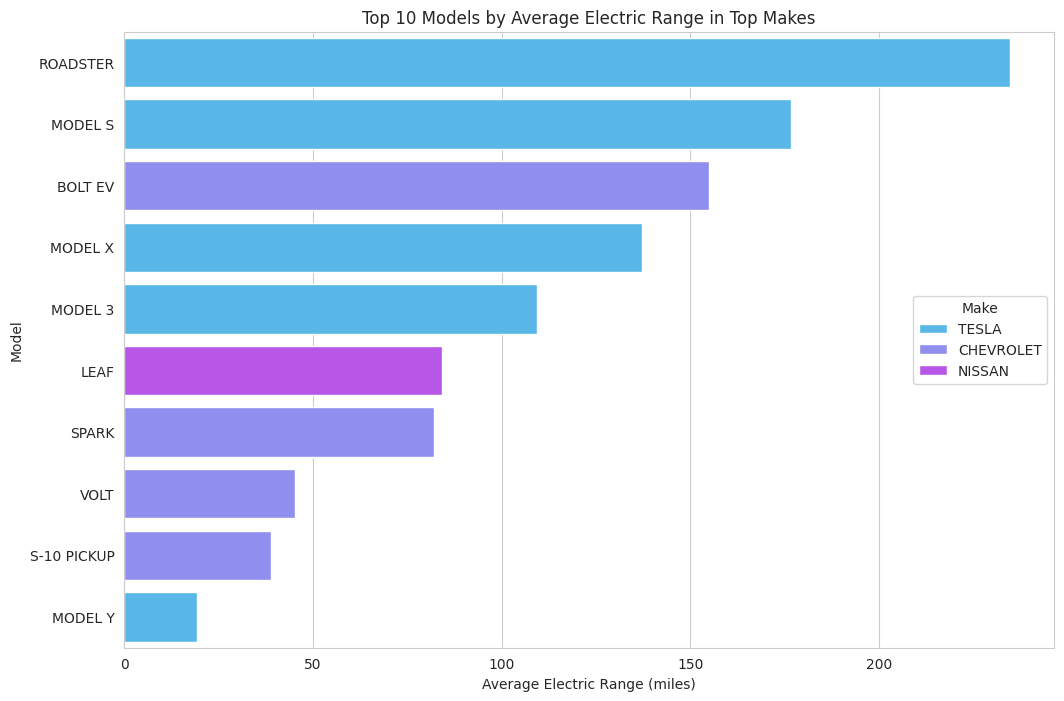

In [56]:
#let’s explore how electric ranges vary among the top manufacturers and models.
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

The TESLA ROADSTER has the highest average electric range among the models listed. TESLA’s models (ROADSTER, MODEL S, MODEL X, and MODEL 3) occupy the majority of the top positions, indicating that on average, TESLA’s vehicles have higher electric ranges. The CHEVROLET BOLT EV is an outlier among the CHEVROLET models, having a substantially higher range than the VOLT and S-10 PICKUP from the same maker. NISSAN’s LEAF and CHEVROLET’s SPARK are in the lower half of the chart, suggesting more modest average ranges.

# **Estimated Market Size Analysis of Electric Vehicles in the United States**
1. the estimated market size of electric vehicles in the United States.first count the number of EVs registered every year:

In [57]:
# calculate the number of EVs registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

,count
Model Year,
1997,1
1998,1
1999,5
2000,7
2002,2
2003,1
2008,19
2010,23
2011,775


The dataset provides the number of electric vehicles registered each year from 1997 through 2024. However, the data for 2024 is incomplete as it only contains the data till March.
* In 2021, there were 19,063 EVs registered.
* In 2022, the number increased to 27708 EVs.
* In 2023, a significant jump to 57,519 EVs was observed.
* For 2024, currently, 7,072 EVs are registered, which suggests partial data.
* To forecast the total number of EVs expected to be registered in 2024, we can use a growth rate based approach from previous complete years.







calculate the Compound Annual Growth Rate (CAGR) between a recent year with complete data (2023) and an earlier year to project the 2024 figures. Additionally, using this growth rate, we can estimate the market size for the next five years. Let’s proceed with these calculations:

In [58]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.2066611501, 2025: 119653.95934090775, 2026: 181047.21317328632, 2027: 273940.7335817853, 2028: 414496.9933533305, 2029: 627171.2689549965}


plot the estimated market size data:

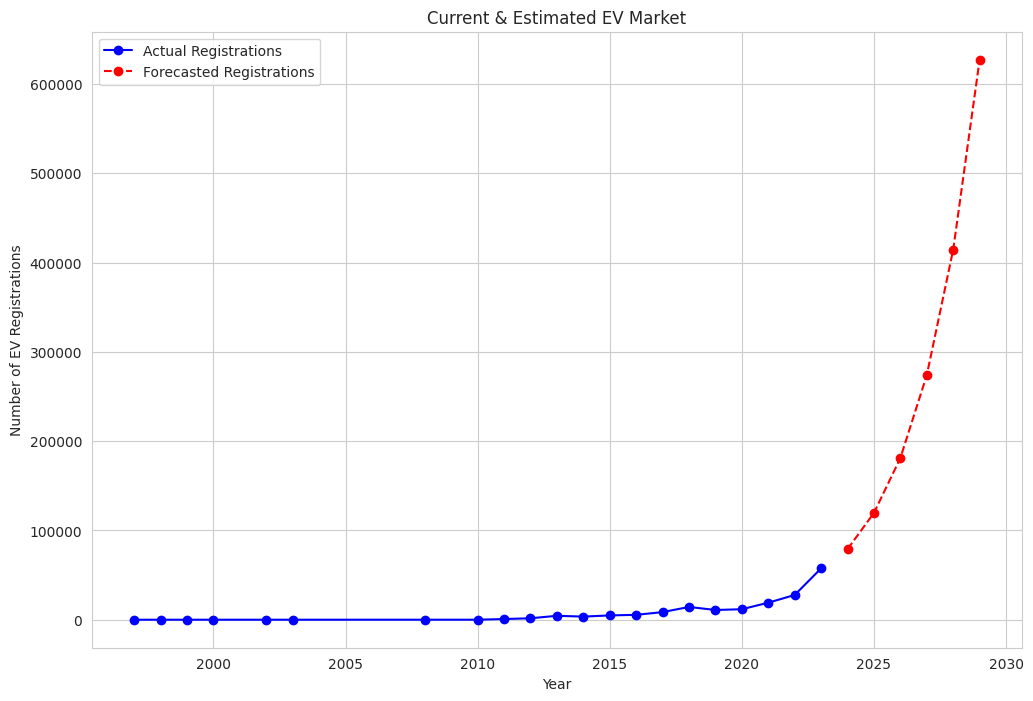

In [59]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

* The number of actual EV registrations remained relatively low and stable until around 2010, after which there was a consistent and steep upward trend, suggesting a significant increase in EV adoption.
* The forecasted EV registrations predict an even more dramatic increase in the near future, with the number of registrations expected to rise sharply in the coming years.


Given the growing trend in actual EV registrations and the projected acceleration as per the forecast data, we can conclude that the EV market size is expected to expand considerably. The steep increase in forecasted registrations suggests that consumer adoption of EVs is on the rise, and this trend is likely to continue. Overall, the data point towards a promising future for the EV industry, indicating a significant shift in consumer preferences and a potential increase in related investment and business opportunities.

# Summary
So, market size analysis is a crucial aspect of market research that determines the potential sales volume within a given market. It helps businesses understand the magnitude of demand, assess market saturation levels, and identify growth opportunities. From our market size analysis of electric vehicles, we found a promising future for the EV industry, indicating a significant shift in consumer preferences and a potential increase in related investment and business opportunities.